In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/main_data.csv')

In [3]:
df.head()

,N,P,K,pH,EC,OC,Zn,Fe,Cu,Mn,Fertility
0,132,6.4,517,7.50,0.61,0.49,0.46,5.02,0.69,7.15,0
1,264,4.8,549,7.27,0.78,1.07,0.41,4.58,0.86,8.02,0
2,276,5.5,348,7.30,0.62,0.20,0.28,5.32,0.74,2.78,1
3,207,7.2,444,7.54,0.42,0.29,0.37,8.02,1.42,11.05,0
4,295,7.2,348,7.80,0.55,0.10,0.24,6.33,1.02,3.25,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          800 non-null    int64  
 1   P          800 non-null    float64
 2   K          800 non-null    int64  
 3   pH         800 non-null    float64
 4   EC         800 non-null    float64
 5   OC         800 non-null    float64
 6   Zn         800 non-null    float64
 7   Fe         800 non-null    float64
 8   Cu         800 non-null    float64
 9   Mn         800 non-null    float64
 10  Fertility  800 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 68.9 KB


In [5]:
df[df['Fertility'] == 0].shape

(300, 11)

In [6]:
df[df['Fertility'] == 1].shape

(500, 11)

<Axes: >

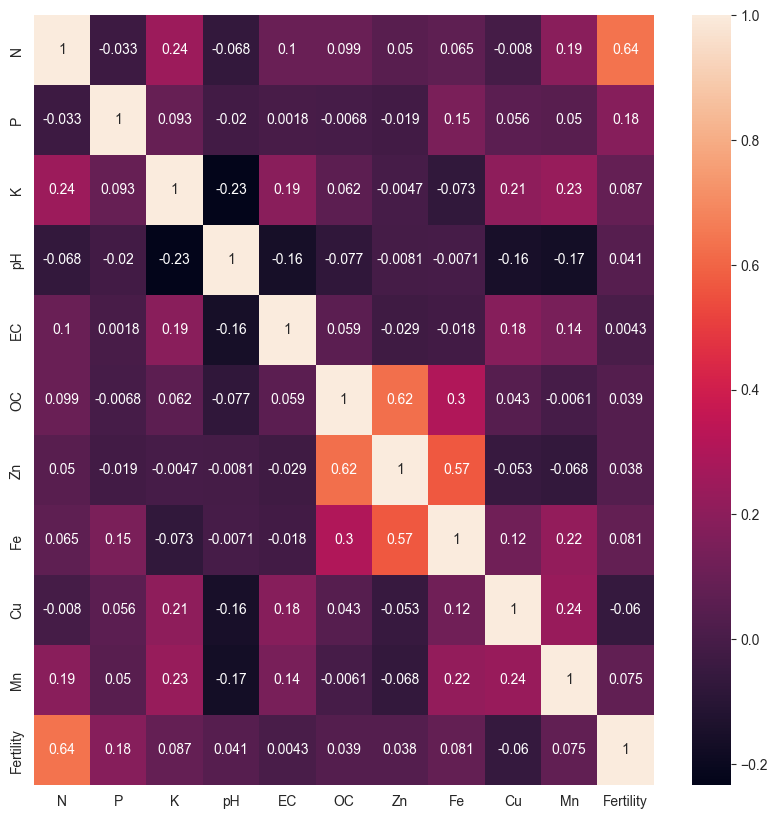

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)

Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('Fertility', axis=1)

In [10]:
y=df['Fertility']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Implementing Naive Bayes Classifier without any OverSampling and UnderSampling Techniques

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
classifier = GaussianNB()

In [14]:
classifier.fit(X_train,y_train)

GaussianNB()

In [15]:
y_pred = classifier.predict(X_test)

Checking the metrics

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
accuracy_score(y_pred,y_test)

0.5375

In [18]:
confusion_matrix(y_pred,y_test)

array([[ 81, 104],
       [  7,  48]])

In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       185
           1       0.32      0.87      0.46        55

    accuracy                           0.54       240
   macro avg       0.62      0.66      0.53       240
weighted avg       0.78      0.54      0.56       240



Now OverSampling with the help of Smote and then training the model

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE()

In [22]:
X.shape

(800, 10)

In [23]:
y.shape

(800,)

In [24]:
X_smote,y_smote = smote.fit_resample(df[['N','P','K','pH','EC','OC','Zn','Fe','Cu','Mn']], df['Fertility'])

In [25]:
X_smote.shape

(1000, 10)

In [26]:
y_smote.shape

(1000,)

In [27]:
y_smote[y_smote == 0].shape

(500,)

In [28]:
y_smote[y_smote == 1].shape

(500,)

Now Train Test Split after applying SMOTE

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

In [30]:
classifier.fit(X_train,y_train)

GaussianNB()

In [31]:
y_smote_pred = classifier.predict(X_test)

Checking The Metrics after oversampling with somte

In [32]:
accuracy_score(y_smote_pred,y_test)

0.6233333333333333

In [33]:
confusion_matrix(y_smote_pred,y_test)

array([[134, 104],
       [  9,  53]])

In [34]:
print(classification_report(y_smote_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70       238
           1       0.34      0.85      0.48        62

    accuracy                           0.62       300
   macro avg       0.64      0.71      0.59       300
weighted avg       0.81      0.62      0.66       300



Now applying NCR UnderSampling

In [35]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [36]:
ncr = NeighbourhoodCleaningRule(n_neighbors = 5)

In [37]:
X.shape

(800, 10)

In [38]:
y.shape

(800,)

In [39]:
X_ncr,y_ncr = ncr.fit_resample(X, y)

In [40]:
X_ncr.shape

(686, 10)

In [41]:
y_ncr.shape

(686,)

Train test split after applying NCR

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_ncr,y_ncr,test_size=0.3,random_state=42)

Now training and testing gausian naive bayes

In [43]:
classifier.fit(X_ncr,y_ncr)

GaussianNB()

In [44]:
y_pred_ncr = classifier.predict(X_test)

Now Checking the metrics

In [45]:
accuracy_score(y_pred_ncr, y_test)

0.587378640776699

In [46]:
confusion_matrix(y_pred_ncr, y_test)

array([[89, 85],
       [ 0, 32]])

In [47]:
print(classification_report(y_pred_ncr, y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68       174
           1       0.27      1.00      0.43        32

    accuracy                           0.59       206
   macro avg       0.64      0.76      0.55       206
weighted avg       0.89      0.59      0.64       206



Training it with Decision Tree Classifier Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
tree_classifier = DecisionTreeClassifier()

In [50]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'splitter':['best','random']
}

Hyperparameter Tuning

In [51]:
tune = GridSearchCV(estimator=tree_classifier,param_grid=parameters, cv =5)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
tune.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [54]:
tune.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}

In [55]:
tree_classifier = DecisionTreeClassifier(criterion='log_loss',max_depth=6,splitter='random')

Training without any Sampling Techniques

In [56]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, splitter='random')

In [57]:
y_pred_tree = tree_classifier.predict(X_test)

In [58]:
accuracy_score(y_pred_tree,y_test)

0.8791666666666667

In [59]:
confusion_matrix(y_pred_tree,y_test)

array([[ 83,  24],
       [  5, 128]])

In [60]:
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       107
           1       0.84      0.96      0.90       133

    accuracy                           0.88       240
   macro avg       0.89      0.87      0.87       240
weighted avg       0.89      0.88      0.88       240



Training after applying SMOTE for Oversampling

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

In [87]:
tune.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [88]:
tune.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}

In [89]:
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')

In [90]:
tree_classifier.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')

In [91]:
y_pred_tree_smote = tree_classifier.predict(X_test)

In [92]:
accuracy_score(y_pred_tree_smote,y_test)

0.99

In [93]:
confusion_matrix(y_pred_tree_smote,y_test)

array([[142,   2],
       [  1, 155]])

In [94]:
print(classification_report(y_pred_tree_smote,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.99      0.99      0.99       156

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Training Decision tree after applying NCR

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_ncr,y_ncr,test_size=0.3,random_state=42)

In [77]:
tune.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [78]:
tune.best_params_

{'criterion': 'log_loss', 'max_depth': 9, 'splitter': 'random'}

In [79]:
tree_classifier = DecisionTreeClassifier(criterion='log_loss',max_depth=9,splitter='random')

In [81]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=9, splitter='random')

In [82]:
y_pred_tree_ncr = tree_classifier.predict(X_test)

In [83]:
accuracy_score(y_pred_tree_ncr,y_test)

0.970873786407767

In [84]:
confusion_matrix(y_pred_tree_ncr,y_test)

array([[ 86,   3],
       [  3, 114]])

In [85]:
print(classification_report(y_pred_tree_ncr,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.97      0.97      0.97       117

    accuracy                           0.97       206
   macro avg       0.97      0.97      0.97       206
weighted avg       0.97      0.97      0.97       206



Now Training the data with KNN algorithm